In [1]:
import sys
sys.path.insert(0, "/Users/bengieru/Neuronal_Cascades/Cython")

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os
import pickle
#import Neuronal_Cascades_base
from Neuronal_Cascades_base import neuron, Geometric_Brain_Network

In [2]:
size = 500
GD = 20
nGD = 8
topology = 'Ring'

CPU times: user 17.2 s, sys: 36.9 ms, total: 17.2 s
Wall time: 17.3 s


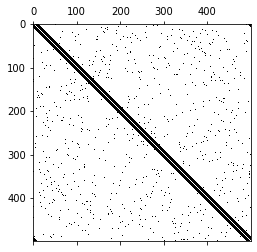

In [3]:
%%time
BN = Geometric_Brain_Network.Geometric_Brain_Network(size, geometric_degree = GD, nongeometric_degree = nGD, manifold = topology)
plt.spy(BN.A)

In [10]:
%%time

TIME = 100
seed = int(size/2)
C = 10000
trials = 1

threshold = 0.6
memory = TIME
rest = 0

neurons_1 = [neuron.neuron(i, memory = memory, rest = rest, threshold = threshold) for i in range(size)]

BN.get_neurons(neurons_1)

old_settings = np.seterr(all = 'ignore')

CPU times: user 696 µs, sys: 5 µs, total: 701 µs
Wall time: 714 µs


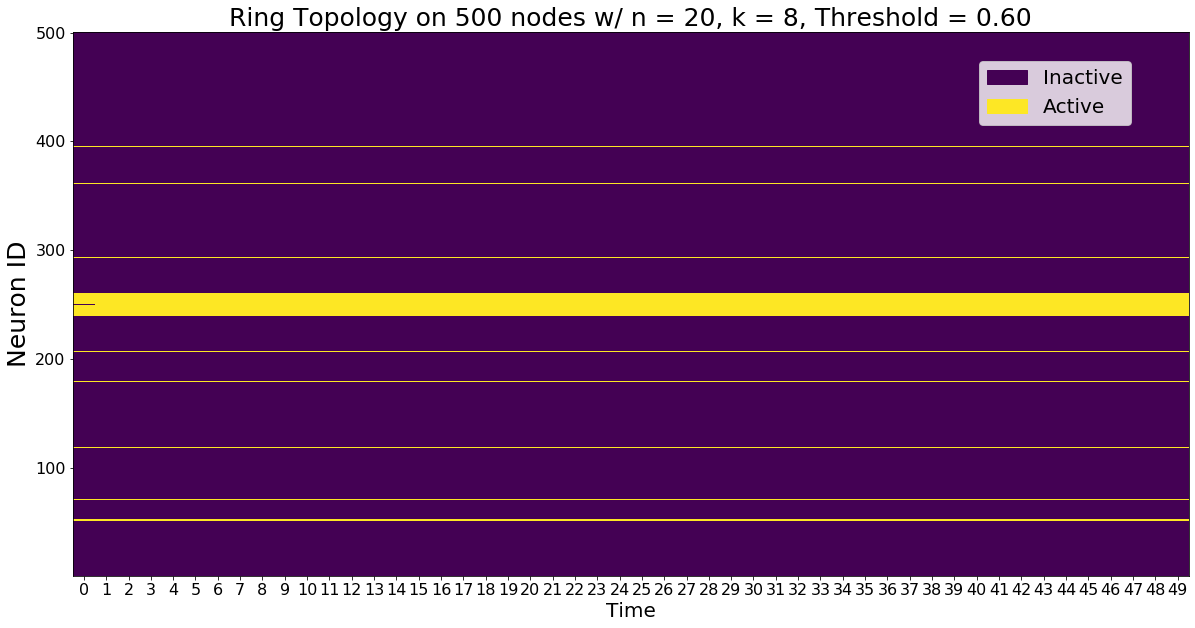

CPU times: user 641 ms, sys: 32.9 ms, total: 674 ms
Wall time: 694 ms


In [11]:
%%time
activation1, Q1 = BN.run_dynamic(seed, TIME, C)
fig,ax = plt.subplots(1,1, figsize = (20,10))
im = ax.imshow(BN.stack_histories(50), interpolation = 'nearest', aspect = 'auto', extent = [-0.5,50-0.5,0.5,size+0.5])
ax.set_xticks([i for i in range(50)])
ax.set_title(r'Ring Topology on 500 nodes w/ n = 20, k = 8, Threshold = %.2f'%(threshold), fontsize = 25)
ax.set_xlabel('Time', fontsize = 20)
ax.set_ylabel('Neuron ID', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 16)

values = np.unique(BN.stack_histories(50))
state = ['Inactive', 'Active']
# get the colors of the values, according to the 
# colormap used by imshow
colors = [im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label = state[i] ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(0.95, 0.95), loc=0, borderaxespad=0.1, prop={'size': 20})

plt.show()

In [12]:
size = 500
GD = 20
nGD = 4
topology = 'Ring'

TIME = 100
trials = 1
C = 1000

memory = TIME
rest = 0

CPU times: user 928 ms, sys: 4.3 ms, total: 933 ms
Wall time: 945 ms


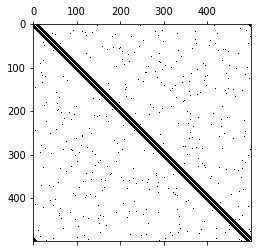

In [13]:
%%time
GBN2 = Geometric_Brain_Network.Geometric_Brain_Network(size, geometric_degree = GD, nongeometric_degree = nGD, manifold = topology)
Adjacency = GBN2.A
plt.spy(Adjacency)

In [10]:
%%time
threshold2 = 0.1
neurons2 = [neuron.neuron(i, memory = memory, rest = rest, threshold = threshold2) for i in range(size)]

GBN2.get_neurons(neurons2)

CPU times: user 420 µs, sys: 37 µs, total: 457 µs
Wall time: 475 µs


CPU times: user 13.6 s, sys: 26.6 ms, total: 13.6 s
Wall time: 13.6 s


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb7bd2b2350>)

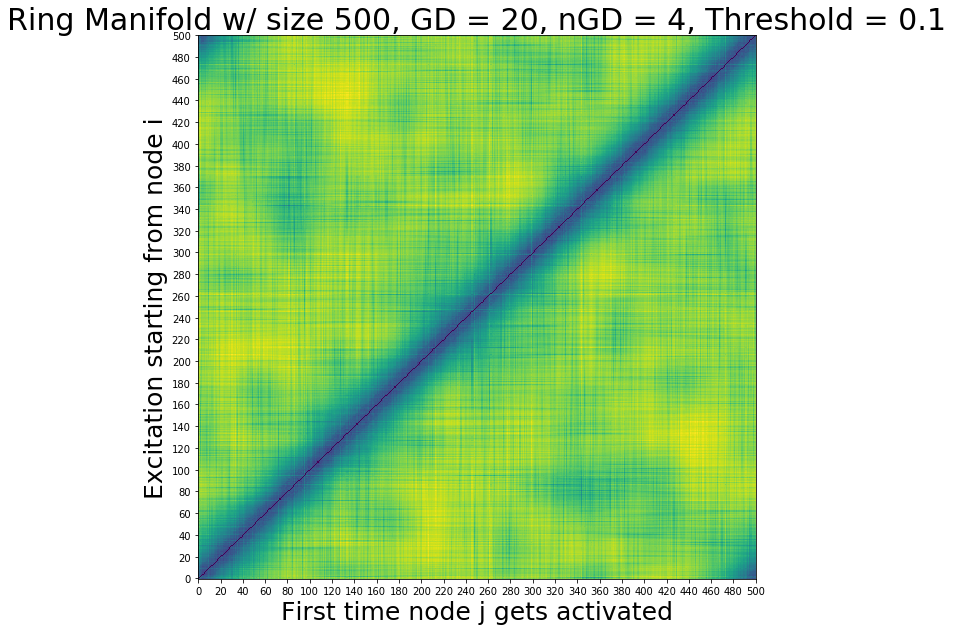

In [13]:
%%time
FAT2, QS2 = GBN2.make_distance_matrix(TIME, C, trials)
spy_distance_matrix(FAT2,size,nGD)

In [12]:
def spy_distance_matrix(distance_matrix, N, nGD):
    fig,ax = plt.subplots(1,1, figsize = (10,10))
    pos = ax.imshow(distance_matrix, origin = 'lower', interpolation = 'nearest', 
                    aspect = 'auto', cmap = 'viridis', extent = [-0.5, N-0.5, -0.5, N-0.5])
    ax.set_title('Ring Manifold w/ size 500, GD = 20, nGD = %d, Threshold = 0.1'%nGD, fontsize = 30)
    ax.set_ylabel('Excitation starting from node i', fontsize = 25)
    ax.set_xlabel('First time node j gets activated', fontsize = 25)
    ax.set_xticks([i*20 for i in range(int(N/20)+1)])
    ax.set_yticks([i*20 for i in range(int(N/20)+1)])

    #cbar = fig.colorbar(pos, ax = ax)
        
    return(fig,ax)